<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

# 학습 목표

- Rolling과 Shift의 기능을 이해합니다.
- Rolling과 Shift 기능을 사용해 필요한 데이터를 추가할 수 있습니다.

# 9. Rolling & Shift

- 시계열 데이터에 대해서 이동 평균값을 구하거나, 행을 Shift(이동) 시킬 때 주로 사용합니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/rolling_shift.png' width=550, align="left"/>

In [0]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 파일 불러오기
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/stock.csv'
stock = pd.read_csv(file_path, sep = ',', skipinitialspace = True)  
stock.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200,3.470226
1,2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400,3.177650
2,2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400,3.224152
3,2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200,2.945139
4,2000-01-07,3.607143,3.410714,3.446429,3.553571,115183600,3.084645


In [3]:
# Date, Close, Volume 열만을 남기기
#stock.drop(['Open', 'High', 'Low', 'Adj Close'], axis=1, inplace=True)
stock = stock[['Date', 'Close', 'Volume']]
stock.head(10)

,Date,Close,Volume
0,2000-01-03,3.997768,133949200
1,2000-01-04,3.660714,128094400
2,2000-01-05,3.714286,194580400
3,2000-01-06,3.392857,191993200
4,2000-01-07,3.553571,115183600
5,2000-01-10,3.491071,126266000
6,2000-01-11,3.312500,110387200
7,2000-01-12,3.113839,244017200
8,2000-01-13,3.455357,258171200
9,2000-01-14,3.587054,97594000


## 9.1.  Rolling

- **rolling()** 메소드를 사용해 현재 행을 기준으로 앞의 몇 행을 묶어 집계할 지 설정합니다.
- **rolling(3).mean()**와 같이 하면 현재 행을 포함해 세 행의 평균을 계산합니다.

In [4]:
# 기준일 포함하여 과거 3일의 평균을 데이터프레임에 붙이기
stock['Close'].rolling(3).mean()

0              NaN
1              NaN
2         3.790923
3         3.589286
4         3.553571
           ...    
5026    282.569997
5027    286.059998
5028    287.993327
5029    290.409993
5030    291.656657
Name: Close, Length: 5031, dtype: float64

In [5]:
# 기준일 포함하여 과거 3일의 평균을 데이터프레임에 붙이기
stock['Close_lag3_1'] = stock['Close'].rolling(3).mean()
stock.head(10)

,Date,Close,Volume,Close_lag3_1
0,2000-01-03,3.997768,133949200,NaN
1,2000-01-04,3.660714,128094400,NaN
2,2000-01-05,3.714286,194580400,3.790923
3,2000-01-06,3.392857,191993200,3.589286
4,2000-01-07,3.553571,115183600,3.553571
5,2000-01-10,3.491071,126266000,3.479167
6,2000-01-11,3.312500,110387200,3.452381
7,2000-01-12,3.113839,244017200,3.305804
8,2000-01-13,3.455357,258171200,3.293899
9,2000-01-14,3.587054,97594000,3.385417


**[참고]어디에 쓰려고?**

- Rolling과 Shift 로 얻어진 결과를 사용해 다양한 분석을 할 수 있습니다.
- 주식의 경우 최근 3일간의 평균 종가와 오늘의 종자를 비교할 수 있습니다.

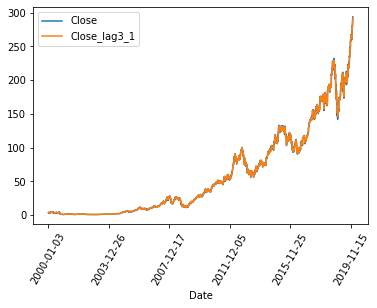

In [6]:
# 선 그래프 그리기
stock.plot(rot=60, x='Date', y=['Close','Close_lag3_1'])
plt.show()

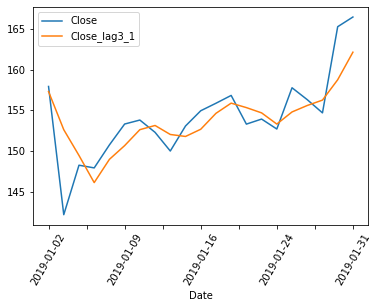

In [7]:
# 2019년 1월 데이터프레임 만들기
stock_new = stock.loc[stock['Date'].between('2019-01-01','2019-01-31')]

# 선 그래프 그리기
stock_new.plot(rot=60, x='Date', y=['Close','Close_lag3_1'])
plt.show()

## 9.2. Shift

- shift() 메소드를 사용해 특정 열의 값이 표시되는 위치를 앞 또는 뒤로 이동할 수 있습니다.
- **stock['Close_lag3_1'].shift(1)**와 같이 하면 Close_lag3_1 열 값을 뒤로 하나 이동하라는 의미입니다.

In [8]:
# 데이터프레임 확인
stock.head(10)

,Date,Close,Volume,Close_lag3_1
0,2000-01-03,3.997768,133949200,NaN
1,2000-01-04,3.660714,128094400,NaN
2,2000-01-05,3.714286,194580400,3.790923
3,2000-01-06,3.392857,191993200,3.589286
4,2000-01-07,3.553571,115183600,3.553571
5,2000-01-10,3.491071,126266000,3.479167
6,2000-01-11,3.312500,110387200,3.452381
7,2000-01-12,3.113839,244017200,3.305804
8,2000-01-13,3.455357,258171200,3.293899
9,2000-01-14,3.587054,97594000,3.385417


In [9]:
# shift()안에 숫자를 변경하면서 기능 확인, default = 1
stock['Close_lag3_2'] = stock['Close_lag3_1'].shift(1) 
stock.head(10)

,Date,Close,Volume,Close_lag3_1,Close_lag3_2
0,2000-01-03,3.997768,133949200,NaN,NaN
1,2000-01-04,3.660714,128094400,NaN,NaN
2,2000-01-05,3.714286,194580400,3.790923,NaN
3,2000-01-06,3.392857,191993200,3.589286,3.790923
4,2000-01-07,3.553571,115183600,3.553571,3.589286
5,2000-01-10,3.491071,126266000,3.479167,3.553571
6,2000-01-11,3.312500,110387200,3.452381,3.479167
7,2000-01-12,3.113839,244017200,3.305804,3.452381
8,2000-01-13,3.455357,258171200,3.293899,3.305804
9,2000-01-14,3.587054,97594000,3.385417,3.293899


## 9.3. Rolling & Shift

- rolling() 메소드와 shift() 메소드를 같이 사용할 수 있습니다.
- 의미은 앞의 내용과 같습니다.

In [10]:
# 이동평균(Rolling)과 하루 뒤로 미루는(Shift) 작업을 한꺼번에 하려면
stock['Close_lag3_3'] = stock['Close'].rolling(3).mean().shift(1)
stock.head(10)

,Date,Close,Volume,Close_lag3_1,Close_lag3_2,Close_lag3_3
0,2000-01-03,3.997768,133949200,NaN,NaN,NaN
1,2000-01-04,3.660714,128094400,NaN,NaN,NaN
2,2000-01-05,3.714286,194580400,3.790923,NaN,NaN
3,2000-01-06,3.392857,191993200,3.589286,3.790923,3.790923
4,2000-01-07,3.553571,115183600,3.553571,3.589286,3.589286
5,2000-01-10,3.491071,126266000,3.479167,3.553571,3.553571
6,2000-01-11,3.312500,110387200,3.452381,3.479167,3.479167
7,2000-01-12,3.113839,244017200,3.305804,3.452381,3.452381
8,2000-01-13,3.455357,258171200,3.293899,3.305804,3.305804
9,2000-01-14,3.587054,97594000,3.385417,3.293899,3.293899


**[참고] min_periods 사용**

- 이전의 결과들을 보면 3개 행을 집계하므로 앞 두 행은 NaN 값을 갖습니다.
- **min_periods** 옵션을 사용해 몇 개 행만 가져도 결괏값을 갖게 할 수 있습니다.

In [11]:
# 값이 몇 개이면 계산을 할 지 지정, min_perios = 1 --> 값이 하나라도 있으면 계산
stock['Close_lag3_4'] = stock['Close'].rolling(3, min_periods=1).mean()
stock.head(8)

,Date,Close,Volume,Close_lag3_1,Close_lag3_2,Close_lag3_3,Close_lag3_4
0,2000-01-03,3.997768,133949200,NaN,NaN,NaN,3.997768
1,2000-01-04,3.660714,128094400,NaN,NaN,NaN,3.829241
2,2000-01-05,3.714286,194580400,3.790923,NaN,NaN,3.790923
3,2000-01-06,3.392857,191993200,3.589286,3.790923,3.790923,3.589286
4,2000-01-07,3.553571,115183600,3.553571,3.589286,3.589286,3.553571
5,2000-01-10,3.491071,126266000,3.479167,3.553571,3.553571,3.479167
6,2000-01-11,3.312500,110387200,3.452381,3.479167,3.479167,3.452381
7,2000-01-12,3.113839,244017200,3.305804,3.452381,3.452381,3.305804


## <center>수고하셨습니다.</center>
<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/end.png' width=200/></center>